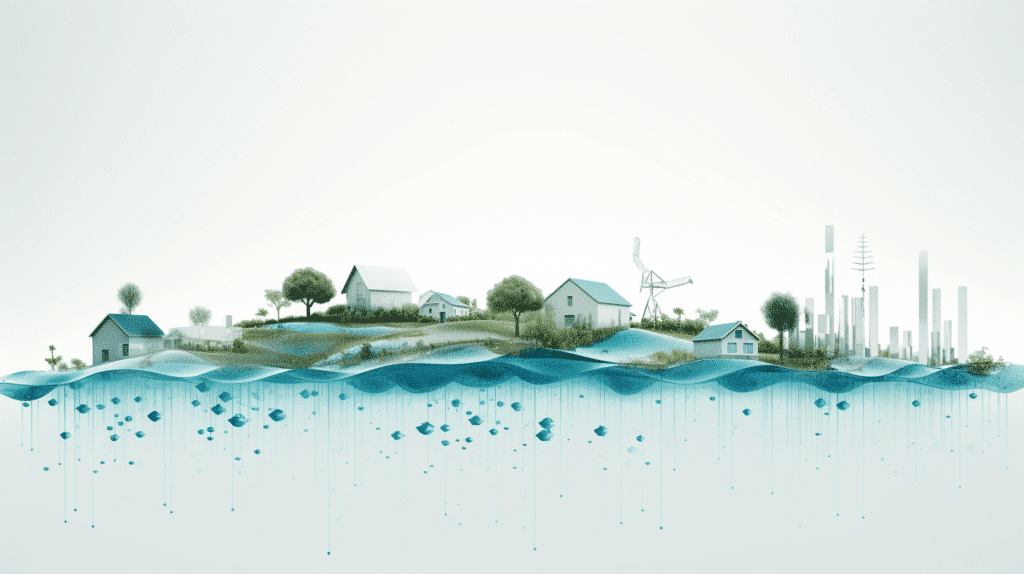

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Project :</font></h3>
    
**Task**: The objective of the task is to predict the FloodProbability for each row in the test dataset. the goal is to build a predictive model that can accurately estimate the probability of flooding..

**Dataset**: The dataset is derived from the Flood Prediction Factors dataset.
The target variable is FloodProbability..

**Exploration**: Explore differences between this dataset and the original Flood Prediction Factors dataset.
Investigate whether incorporating the original dataset into training improves model performance.
Utilize visualization techniques for EDA.
The dataset is suitable for clustering analysis.

**Evaluation**: Submissions are evaluated using the R2 score.

**Submission**: train.csv - the training dataset; FloodProbability is the target
test.csv - the test dataset; your objective is to predict the FloodProbability for each row
sample_submission.csv - a sample submission file in the correct format

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

<h3 align="center"><font color='black'>💡 Evaluation Metric :</font></h3>
    
    
    
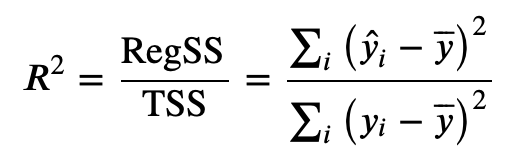
    




<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Packages :</font></h3>
    
🎭we are Importing several Python packages u
    
🧨 Sklearn have,Kfold, mean_squared_error, mean_absolute_error, median_absolute_error.


🥽 XGBoost (eXtreme Gradient Boosting) and LightGBM are both powerful machine learning algorithms used for supervised learning tasks, particularly in the realm of gradient boosting

    
🎍Numpy, Pandas, Matplotlib, Seaborn :NumPy for numerical computing, Pandas for data manipulation, Matplotlib for plotting, and Seaborn for statistical visualization.
    



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

In [3]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")
df_sub = pd.read_csv("sample_submission.csv")

In [4]:
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
df_train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [6]:
df_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [7]:
df_sub.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


df_train_with_const = add_constant(df_train) 


vif_data = pd.DataFrame()
vif_data["feature"] = df_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_train_with_const.values, i) for i in range(df_train_with_const.shape[1])]

print(vif_data)

                            feature         VIF
0                             const  152.517829
1                                id    1.000011
2                  MonsoonIntensity    1.331574
3                TopographyDrainage    1.348860
4                   RiverManagement    1.343868
5                     Deforestation    1.338782
6                      Urbanization    1.347294
7                     ClimateChange    1.338716
8                       DamsQuality    1.346030
9                         Siltation    1.338225
10            AgriculturalPractices    1.339117
11                    Encroachments    1.346542
12  IneffectiveDisasterPreparedness    1.343053
13                  DrainageSystems    1.340917
14             CoastalVulnerability    1.351291
15                       Landslides    1.343013
16                       Watersheds    1.345418
17      DeterioratingInfrastructure    1.334803
18                  PopulationScore    1.346067
19                      WetlandLoss    1

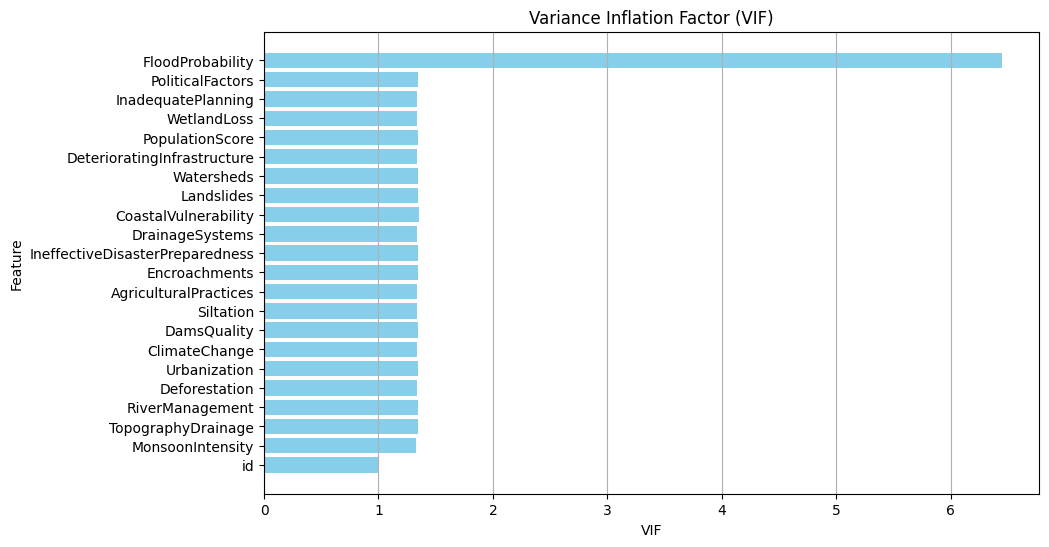

In [9]:
vif_data = vif_data[vif_data['feature'] != 'const']
plt.figure(figsize=(10, 6))
plt.barh(vif_data['feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.title('Variance Inflation Factor (VIF)')
plt.grid(axis='x')
plt.show()

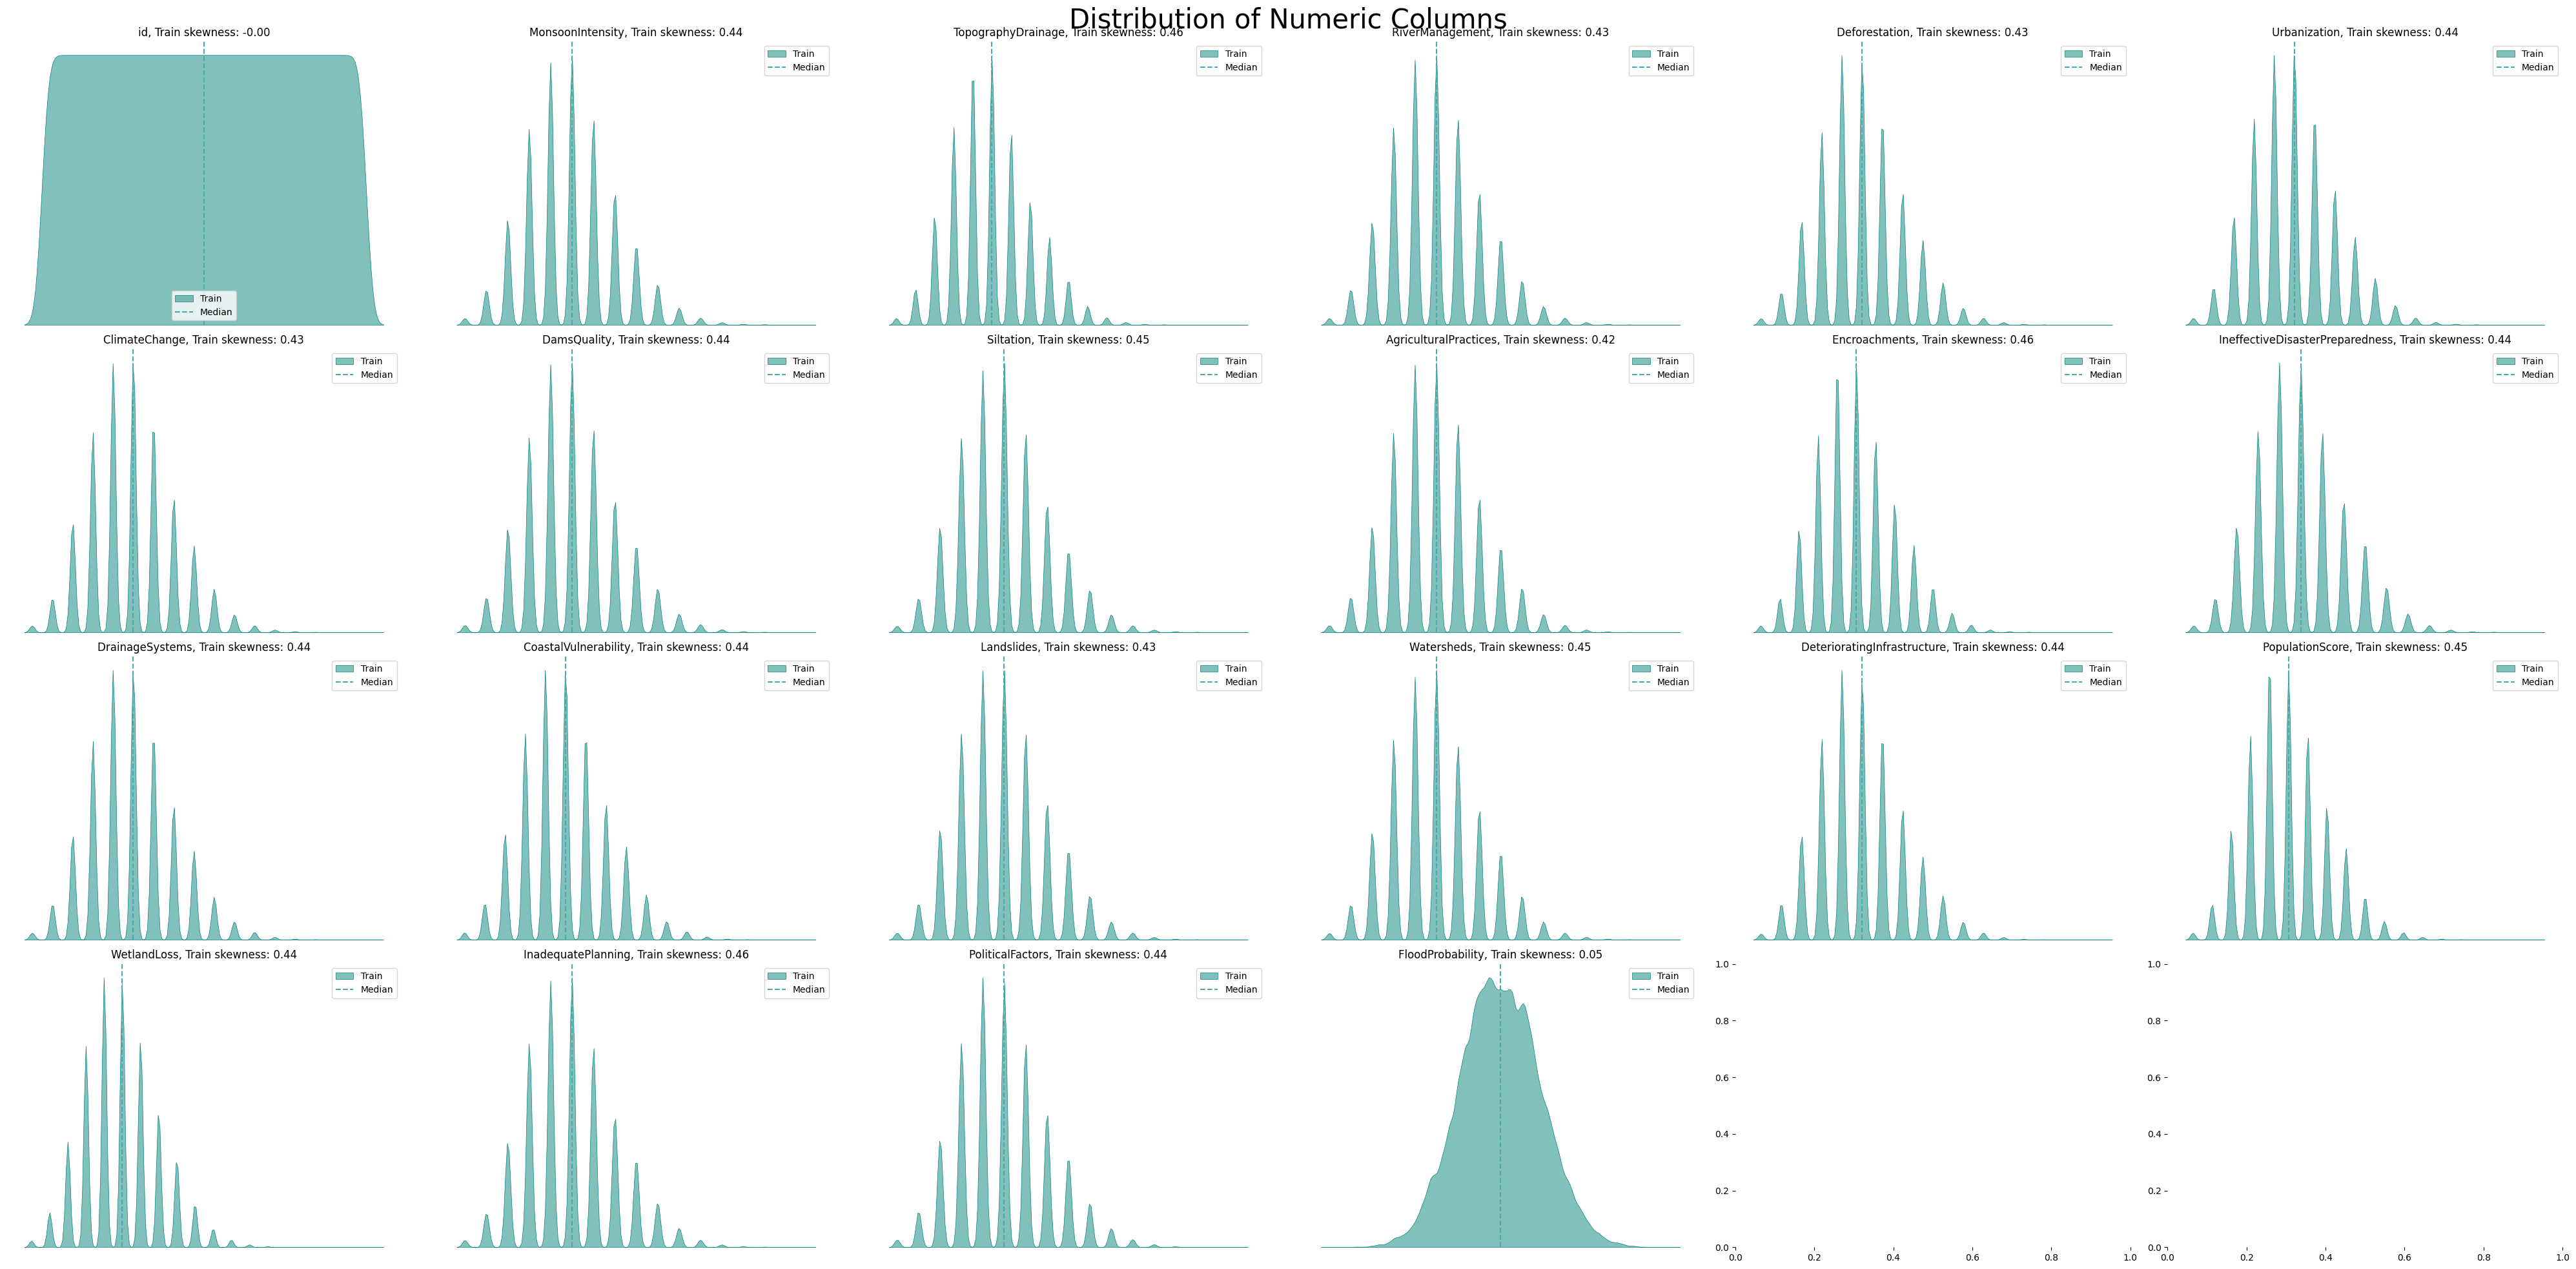

In [10]:
numeric_columns = df_train.select_dtypes(include=['float64', 'int64'])

def dist(train_dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(40, 20))
    axs = axs.flatten()
    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#058279', label='Train')
        axs[i].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}')
        axs[i].legend()
        axs[i].axis('off')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        median_train = train_dataset[col].median()
        axs[i].axvline(x=median_train, color='#4caba4', linestyle='--')
        axs[i].legend(labels=['Train', 'Median'])
        
    fig.suptitle('Distribution of Numeric Columns', fontsize=30)
    plt.tight_layout()
    sns.despine(left=True, bottom=True) 

dist(train_dataset=df_train, columns_list=numeric_columns.columns, rows=4, cols=6)


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


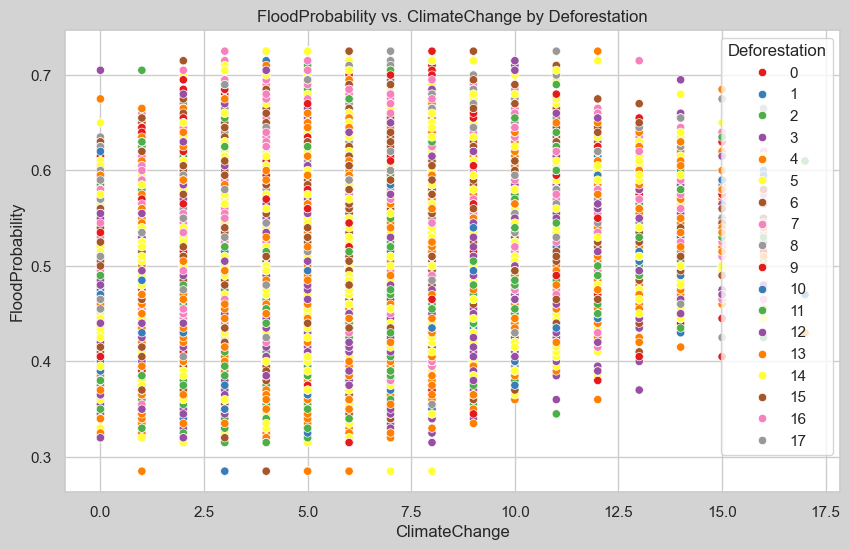

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='ClimateChange', y='FloodProbability', hue='Deforestation', palette='Set1')
plt.title('FloodProbability vs. ClimateChange by Deforestation')
plt.xlabel('ClimateChange')
plt.ylabel('FloodProbability')
plt.legend(title='Deforestation')
plt.gcf().set_facecolor('lightgrey') 
plt.show()

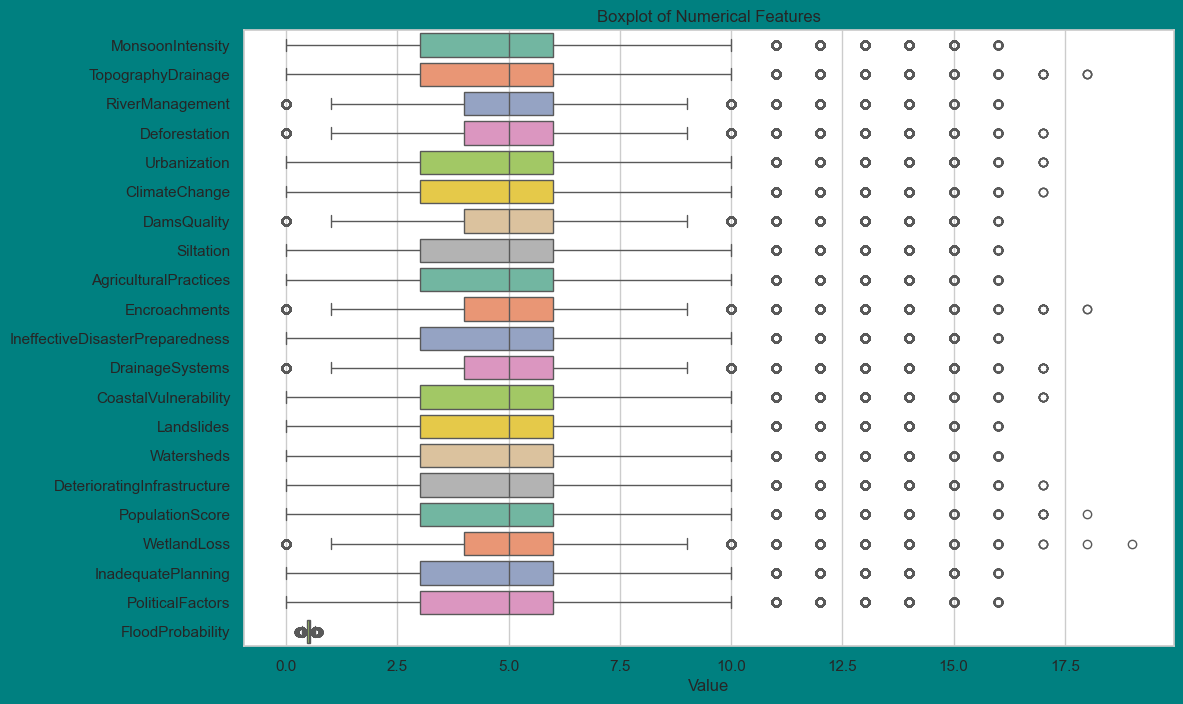

In [12]:
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns.drop('id')
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train[numeric_features], orient="h", palette="Set2")
plt.title('Boxplot of Numerical Features')
plt.xlabel('Value')
plt.gcf().set_facecolor('#008080')
plt.show()

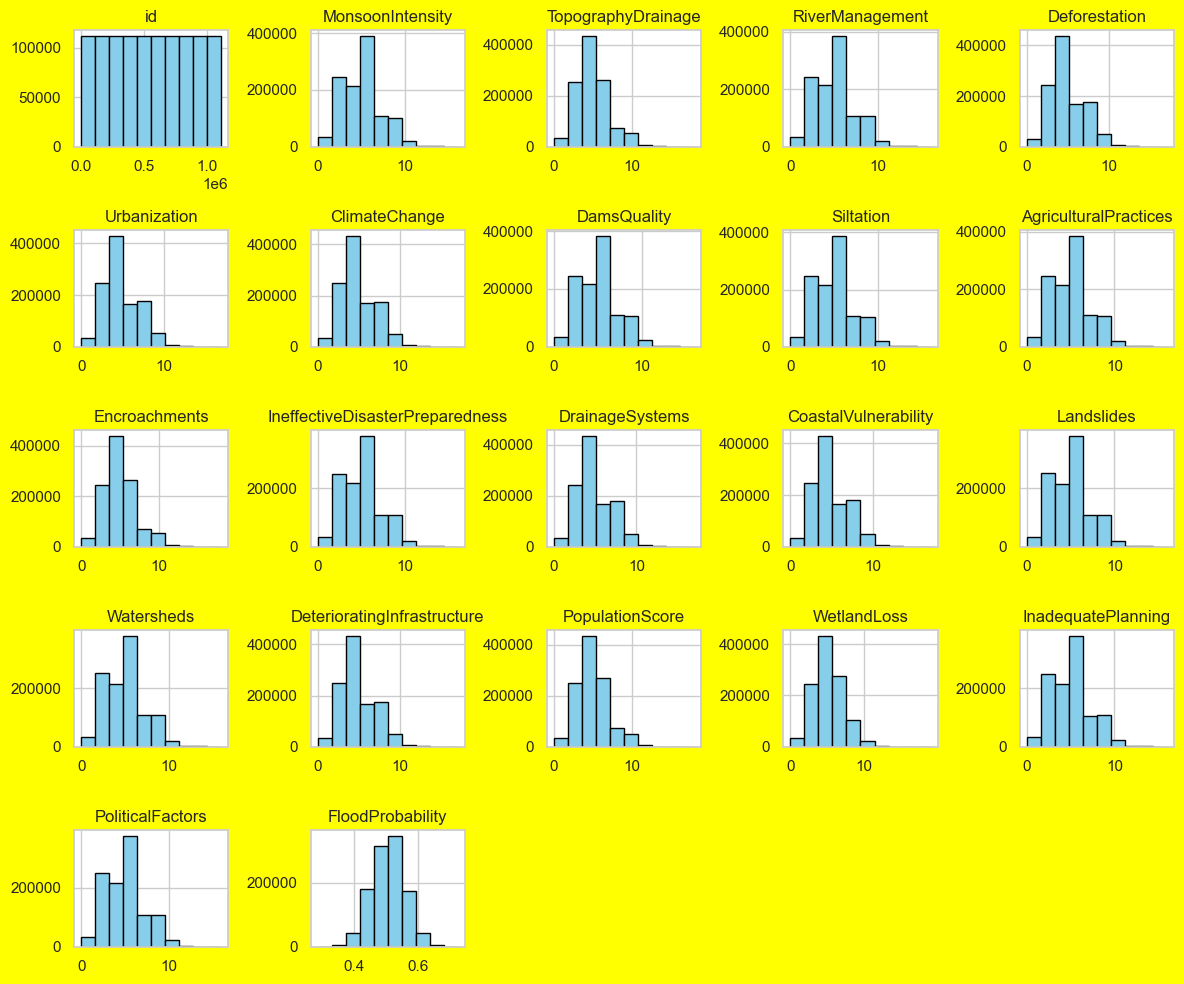

In [13]:
df_train.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('yellow')
plt.tight_layout()
plt.show()

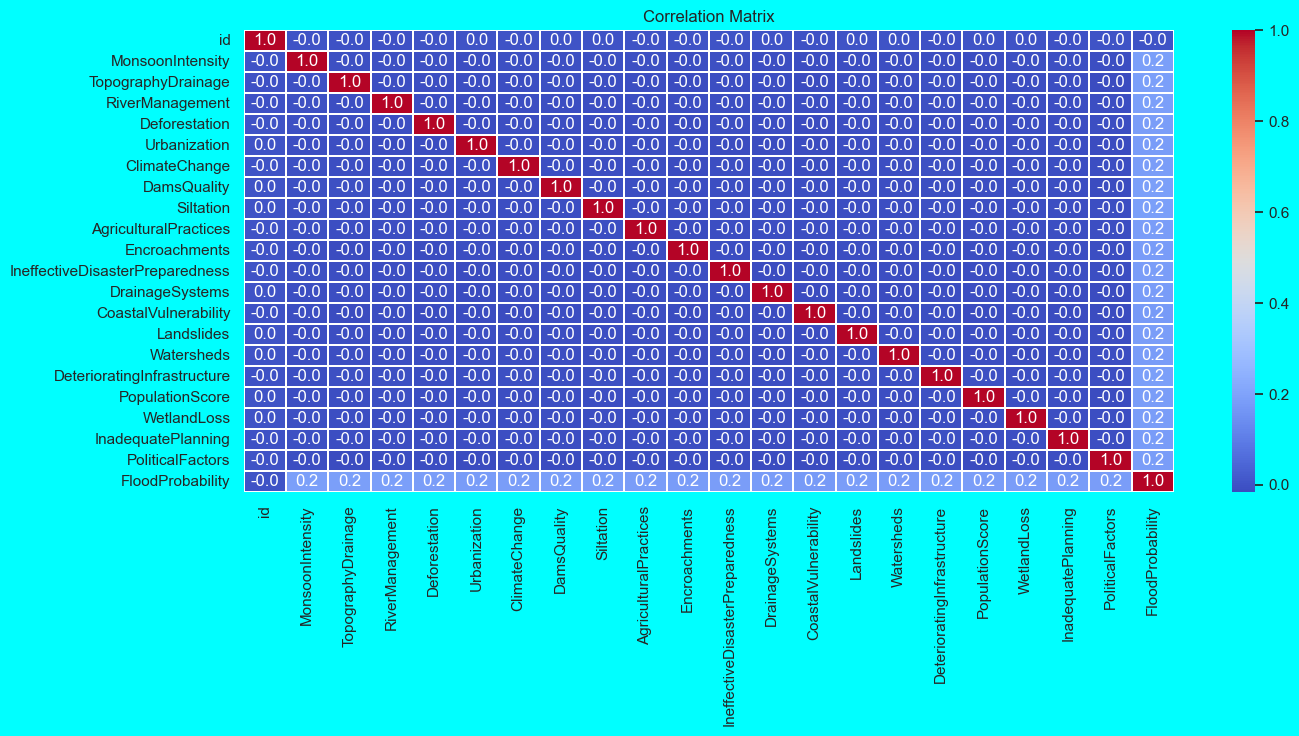

In [ ]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.gcf().set_facecolor("#7F9090")  
plt.title('Correlation Matrix')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
    
**Data Type and Count:** The dataset **consists of 21 columns, with 20 features (all integers)** and 1 target variable (float64).T**here are 1,117,957 entries** in the dataset.
    
**Summary Statistics:**  The **mean FloodProbability is approximately 0.504**, with **a median of 0.505**.FloodProbability ranges from **0.285 to 0.725**, with a **standard deviation of 0.051**.The **skewness is positive (0.047)**, indicating a **slight right-skewed distribution**.**Kurtosis is negative (-0.039), suggesting the distribution has lighter tails than a normal distribution**.
    
**Feature Distributions:**  All **features exhibit similar distributions**, **with mean and median values around 5**.The standard **deviation for features ranges from approximately 2.05 to 2.09**.There are **no apparent missing values** in any of the features, as indicated by the consistent non-null counts across all columns.
    
**Feature Relationships:**
There is **no noticeable correlation among the features**, as indicated by their **low skewness and kurtosis values**.
However, all **features demonstrate correlations with the target variable (FloodProbability)**, suggesting their potential relevance in predicting flood probabilities.
    

In [15]:
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [16]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")

In [18]:
df_test.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [19]:
y = df_train['FloodProbability'] 
df_train = df_train.drop(['FloodProbability'],axis=1)
X = df_train

In [20]:
from scipy.stats import entropy
from scipy.signal import welch,find_peaks


def count_peaks(row):
    peaks, _ = find_peaks(row)
    return len(peaks)

def spectral_entropy(row):
    _, psd = welch(row)
    return entropy(psd)

def cleaning(dataset):
    
    features = dataset.columns.tolist() 
    dataset['mean_features'] = 0.1 * dataset[features].mean(axis=1)
    dataset['std_features'] = dataset[features].std(axis=1)
    dataset['max_features'] = dataset[features].max(axis=1)
    dataset['min_features'] = dataset[features].min(axis=1)
    dataset['range_features'] = dataset['max_features'] - dataset['min_features']
    dataset['variance_features'] = dataset[features].var(axis=1)
    dataset['skewness_features'] = dataset[features].skew(axis=1)
    dataset['sum_features'] = dataset[features].sum(axis=1)

   
    mean_abs_dev = (dataset[features] - dataset[features].mean(axis=1).values.reshape(-1, 1)).abs().mean(axis=1)
    median_abs_dev = (dataset[features] - dataset[features].median(axis=1).values.reshape(-1, 1)).abs().mean(axis=1)
    range_abs_diff = (dataset[features] - dataset[features].median(axis=1).values.reshape(-1, 1)).abs().max(axis=1) - (dataset[features] - dataset[features].median(axis=1).values.reshape(-1, 1)).abs().min(axis=1)
    geometric_mean = np.exp(np.log(dataset[features].replace(0, 1)).mean(axis=1))
    harmonic_mean = len(features) / (1 / dataset[features].replace(0, 1)).sum(axis=1)
    coeff_variation = dataset['std_features'] / dataset['mean_features']

   
    quartiles = dataset[features].quantile([0.25, 0.5, 0.75], axis=1)
    dataset['first_quartile'] = quartiles.loc[0.25]
    dataset['second_quartile'] = quartiles.loc[0.5]
    dataset['third_quartile'] = quartiles.loc[0.75]

 
    kurtosis_features = dataset[features].kurtosis(axis=1)
    dataset['kurtosis_features'] = kurtosis_features

    dataset['mean_absolute_deviation'] = mean_abs_dev
    dataset['median_absolute_deviation'] = median_abs_dev
    dataset['range_abs_diff'] = range_abs_diff
    dataset['geometric_mean'] = geometric_mean
    dataset['harmonic_mean'] = harmonic_mean
    dataset['coeff_variation'] = coeff_variation
    
    #peak_features = dataset[features].apply(count_peaks, axis=1)
    #dataset['peak_frequency'] = peak_features
    
    #spectral_entropy_features = dataset[features].apply(spectral_entropy, axis=1)
    #dataset['spectral_entropy'] = spectral_entropy_features   


    #entropy_features = dataset[features].apply(entropy, axis=1)
    #dataset['entropy'] = entropy_features

    #dataset.drop(features, axis=1, inplace=True)

    return dataset


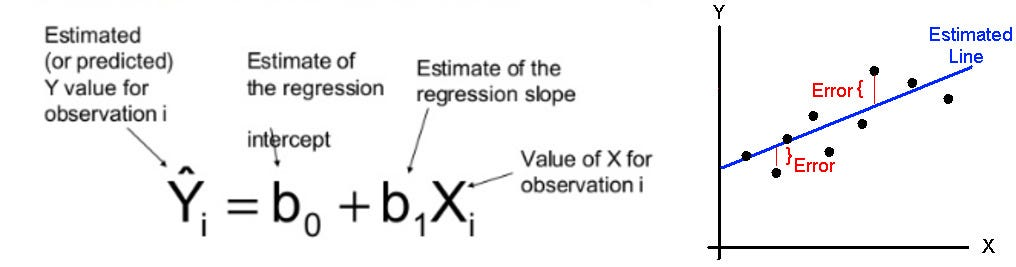

In [21]:
#df_train = cleaning(df_train)
#df_test = cleaning(df_test)

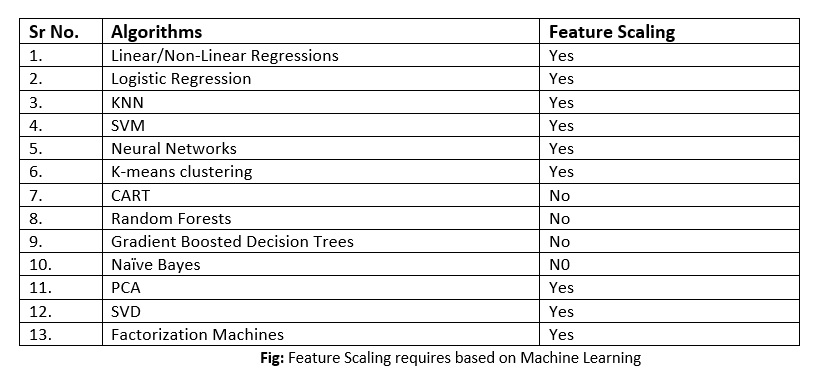

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [23]:
#scaled_train_data = pd.DataFrame(scaled_train_data, columns=df_train.columns)
#scaled_test_data = pd.DataFrame(scaled_test_data, columns=df_test.columns)

from sklearn.linear_model import LinearRegression
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

linear_predictions = np.zeros(len(scaled_train_data))
linear_true_labels = np.zeros(len(scaled_train_data))
linear_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)   
    linear_fold_preds = linear_model.predict(X_val)  
   
    linear_fold_test_preds = linear_model.predict(scaled_test_data)  
   
    linear_predictions[val_idx] = linear_fold_preds
    linear_true_labels[val_idx] = y_val
    linear_test_predictions += linear_fold_test_preds / n_splits  

overall_metric_linear = r2_score(linear_true_labels, linear_predictions)
print("Overall R^2 (Linear Regression):", overall_metric_linear)


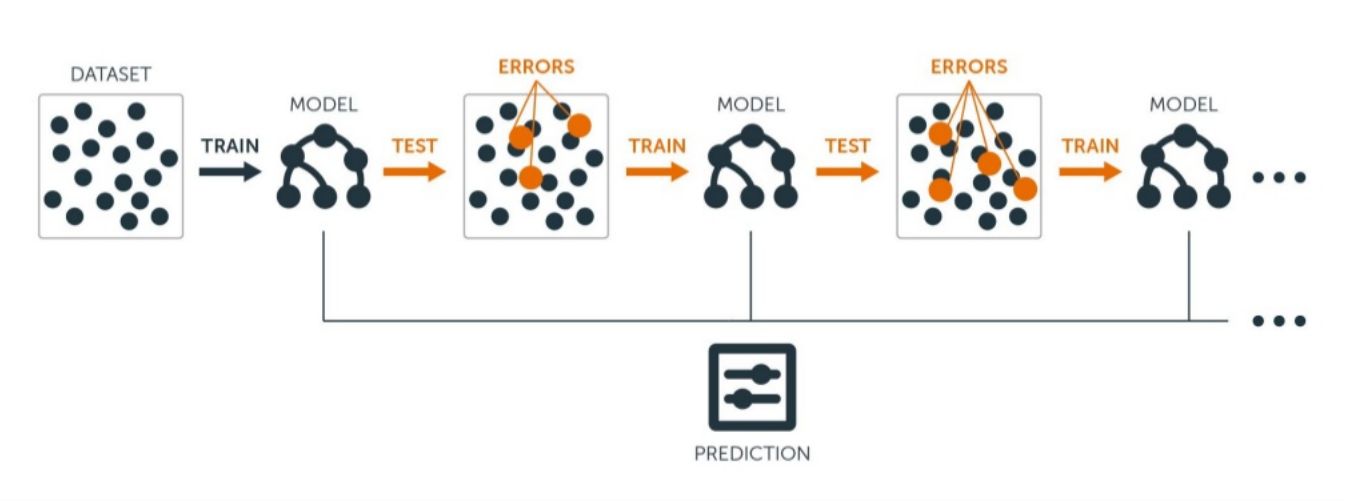

In [43]:
df_sub = df.copy()
df_sub.head()


,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


In [17]:
df_sub = pd.DataFrame()
df_sub['ID'] = test_df.index  # or test_df['ID'] if it exists


In [30]:

train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')


In [31]:
X = train_df.drop('FloodProbability', axis=1)
y = train_df['FloodProbability']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
df_sub = test_df.copy()
df_sub.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


In [23]:
df_sub = test_df.copy()


In [24]:
df_sub.to_csv('submission.csv', index=False)

<Axes: >

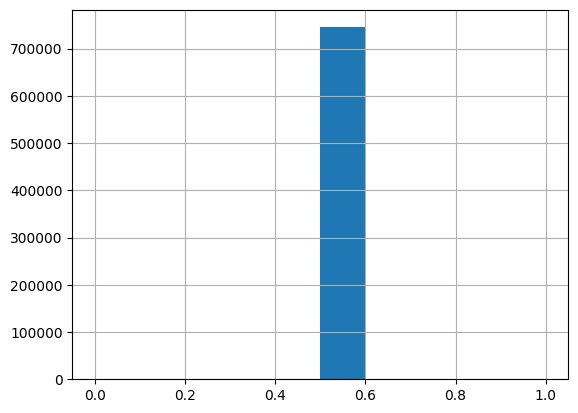

In [25]:
df_sub['FloodProbability'].hist()

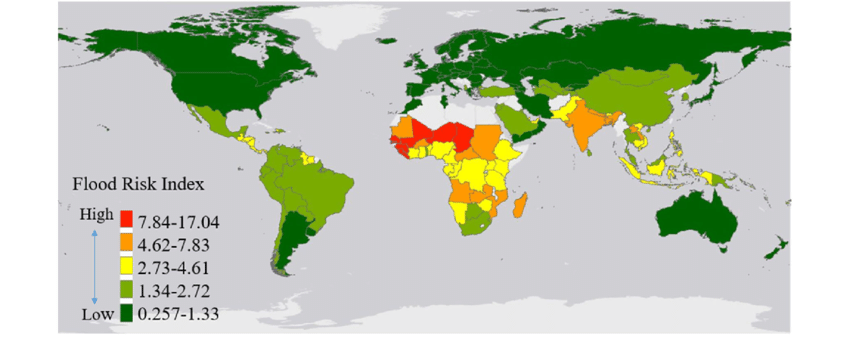